In [58]:
# Imports
from LinesExtraction import *
from Procesado import *
import time

import matplotlib.pyplot as plt
%matplotlib inline  

lE = LinesExtraction()
proc = Procesado()

In [59]:
#Importar imágen de prueba
img = lE.loadImage('1ExtractLinesCropped.bmp')

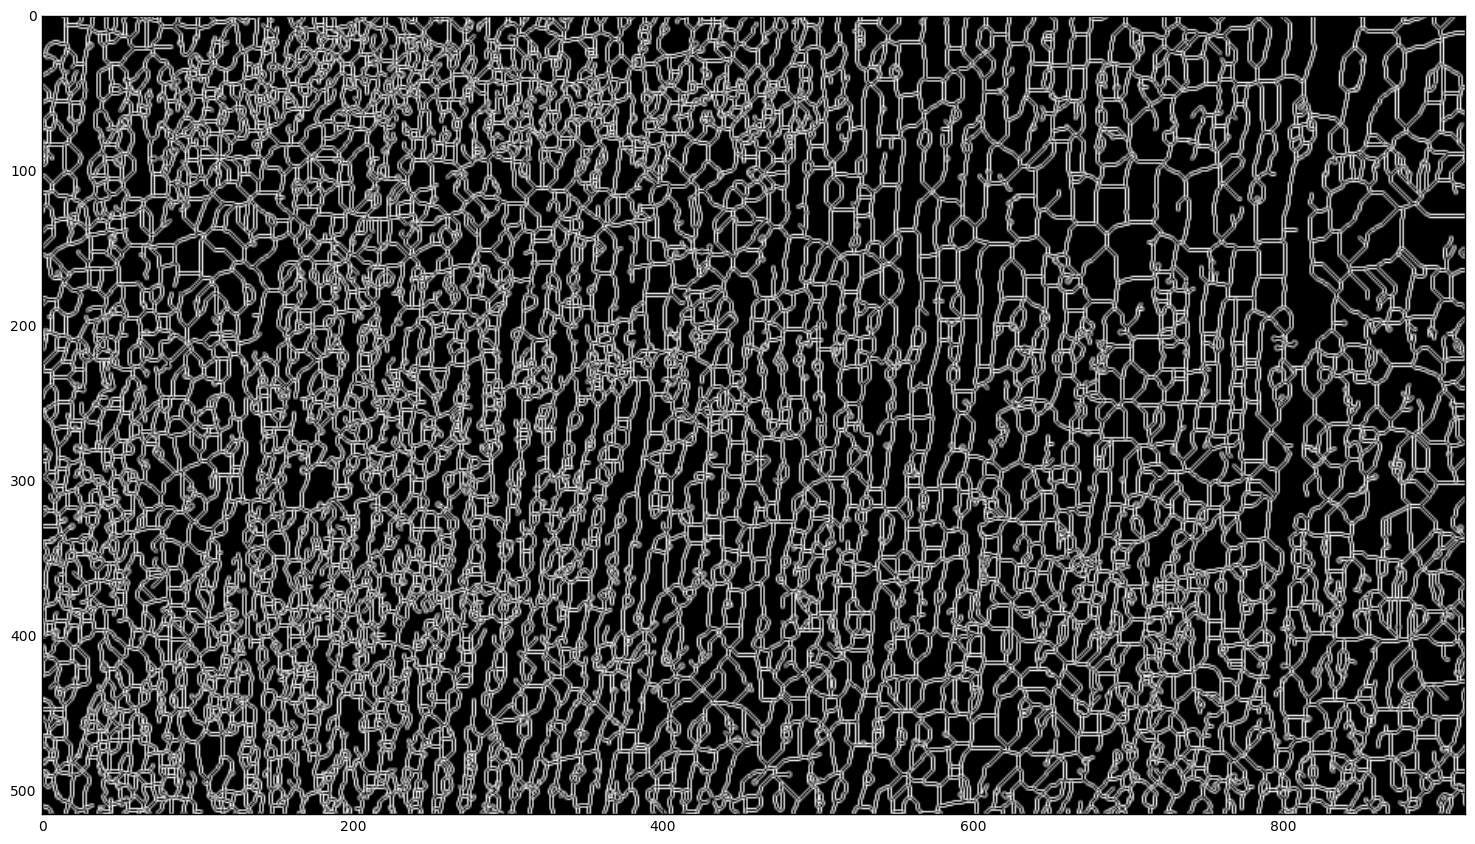

In [56]:
#Probar filtro sobel
from scipy import ndimage
import numpy as np

dx = ndimage.sobel(img, 0, mode='constant', cval=0.0)  # horizontal derivative
dy = ndimage.sobel(img, 1,mode='constant', cval=0.0)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

alto = len(img)
ancho = len(img[0])
plt.figure(figsize=(ancho / 50, alto / 50), dpi=300)
plt.imshow(mag, cmap='gray')

In [3]:
# Obtener los según los resultados del notebook 'Extracion Lineas Hough'
lines3=proc.proHough(2,2,2,img)
lines6=proc.proHough(10,0,0,img)
lines10=proc.proHough(3,2,1,img)

In [4]:
# Crear los grafos
G3=nx.Graph()
G6=nx.Graph()
G10=nx.Graph()

In [5]:
#Tarda bastante
t1 = time.time()
G3 = proc.combina2(3,5,5,5,lines3,G3)
t2 = time.time()
#Minutos
print((t2-t1)/60)
12Minutos

11.79678163131078


In [6]:
k_components3 = apxa.k_components(G3)
segmentosDeVerdad=proc.segmentosVerdad(k_components3,lines3)

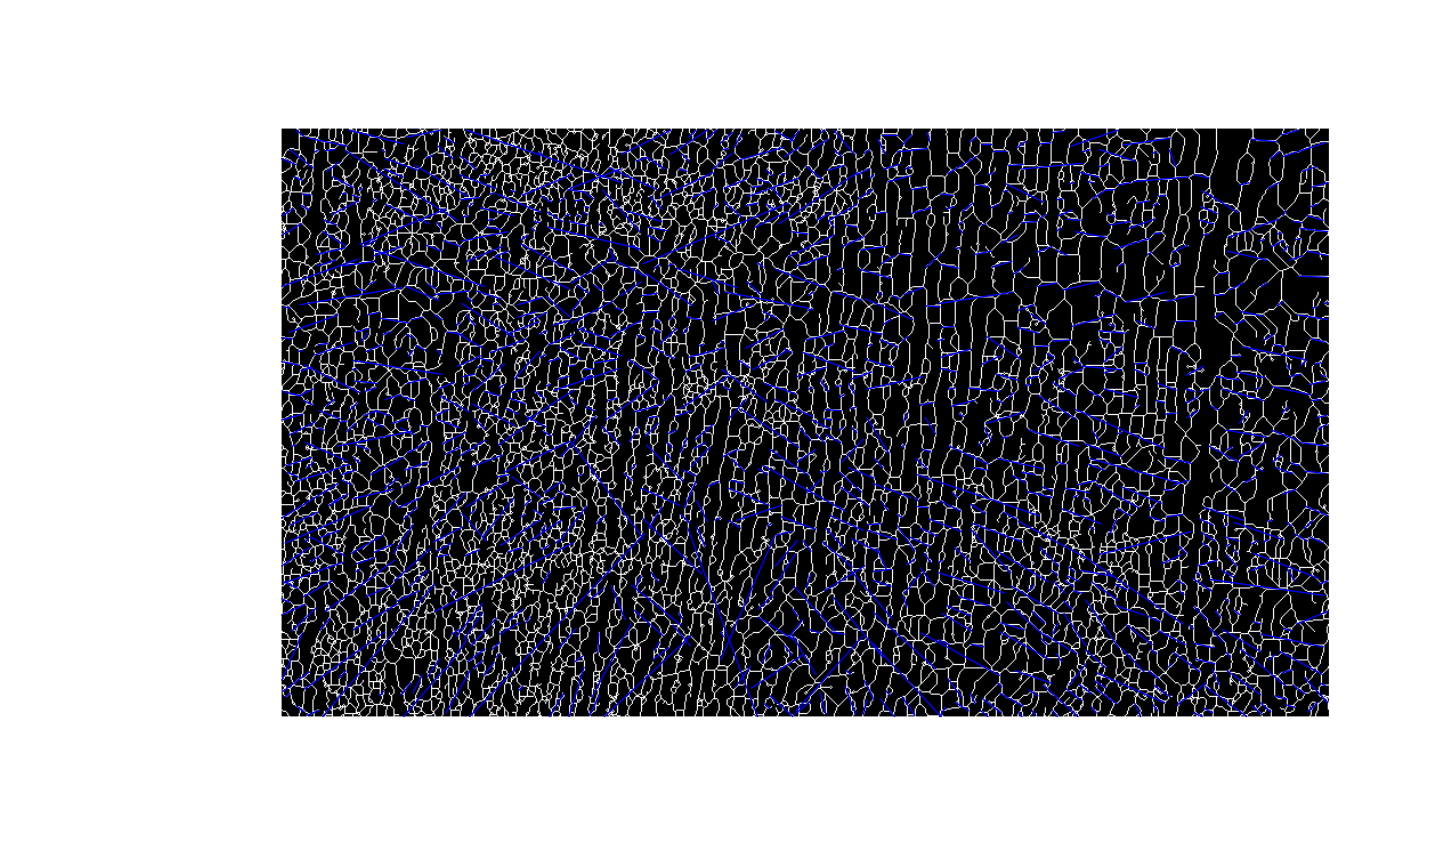

In [11]:
name3=[2,2,2]
lE.mostrar(img, segmentosDeVerdad, name3, True, 'Combinadas\\')